# ATMS 391: Homework Week 7
---

## Problem 1

Load the August weather data for Chicago (from Week 3 exercise 2) into a Pandas DataFrame within your iPython notebook.

(a) Print a table showing the mean, minimum, maximum, and standard deviation for temperature, dewpoint, pressure in the file.

In [4]:
import pandas as pd

data = pd.read_csv('chicago_hourly_aug_2015.csv', header=6)

temp, dewpoint, pressure = {}, {}, {}

# statistics for temperature
temp['mean'] = data[u'DryBulbFarenheit'].mean()
temp['min'] = data[u'DryBulbFarenheit'].min()
temp['max'] = data[u'DryBulbFarenheit'].max()
temp['std'] = data[u'DryBulbFarenheit'].std()

# statistics for dewpoint
dewpoint['mean'] = data[u'DewPointFarenheit'].mean()
dewpoint['min'] = data[u'DewPointFarenheit'].min()
dewpoint['max'] = data[u'DewPointFarenheit'].max()
dewpoint['std'] = data[u'DewPointFarenheit'].std()

# statistics for pressure
pressure['mean'] = data[u'StationPressure'].mean()
pressure['min'] = data[u'StationPressure'].min()
pressure['max'] = data[u'StationPressure'].max()
pressure['std'] = data[u'StationPressure'].std()

print("Temperature statistics: ")
print(temp)
print("Dewpoint statistics: ")
print(dewpoint)
print("Pressure statistics: ")
print(pressure)

Temperature statistics: 
{'std': 7.3373145943206231, 'max': 91, 'min': 52, 'mean': 71.342922899884925}
Dewpoint statistics: 
{'std': 6.4759422318940389, 'max': 73, 'min': 44, 'mean': 60.537399309551205}
Pressure statistics: 
{'std': 0.12465903287454763, 'max': 29.489999999999998, 'min': 28.920000000000002, 'mean': 29.256892980437279}


(b) Plot a histogram, PDF, and CDF of temperature observations.

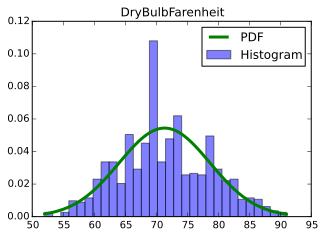

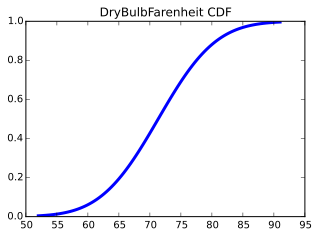

In [21]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

temp_data = data[u'DryBulbFarenheit']
plt.figure(figsize=(5,3.5))
plt.hist(temp_data, bins=30, normed=True, alpha=0.5, label='Histogram')
plt.legend('histogram')
mu, sigma = scipy.stats.norm.fit(temp_data)
x = np.linspace(temp_data.min(), temp_data.max(), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), lw=3, label='PDF');
plt.legend()
plt.title('DryBulbFarenheit')

plt.figure(figsize=(5,3.5))
plt.plot(x, scipy.stats.norm.cdf(x, mu, sigma), lw=3);
plt.title('DryBulbFarenheit CDF')

(c) What are the 1, 25, 50 (median), 75, and 99th percentile values of temperature?

In [23]:
print("1st percentile: %g" %(scipy.stats.scoreatpercentile(temp_data, 1)))
print("25th percentile: %g" %(scipy.stats.scoreatpercentile(temp_data, 25)))
print("50th percentile: %g" %(scipy.stats.scoreatpercentile(temp_data, 50)))
print("75th percentile: %g" %(scipy.stats.scoreatpercentile(temp_data, 75)))
print("99th percentile: %g" %(scipy.stats.scoreatpercentile(temp_data, 90)))

1st percentile: 56
25th percentile: 66
50th percentile: 71
75th percentile: 77
99th percentile: 81


---
## Problem 2

Load in the GISTEMP global temperature anomaly dataset from Week 5(a).

(a) Calculate the mean and standard deviation of the temperature anomalies at each grid point between 1900 and 2014.  Plot these values on a map using `pcolormesh`.  Include a colorbar.

<matplotlib.colorbar.Colorbar instance at 0x7efe0ec31f80>

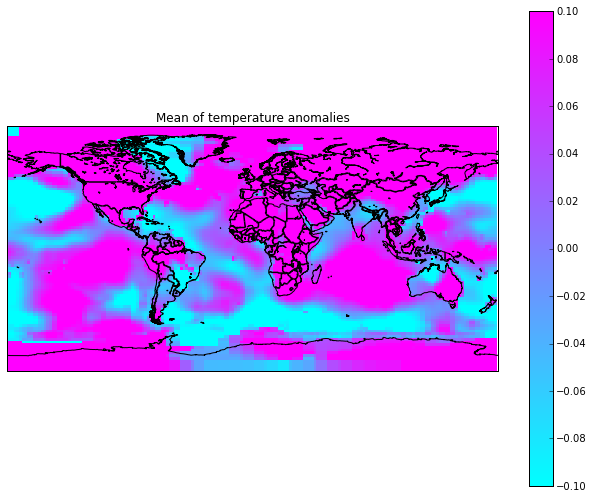

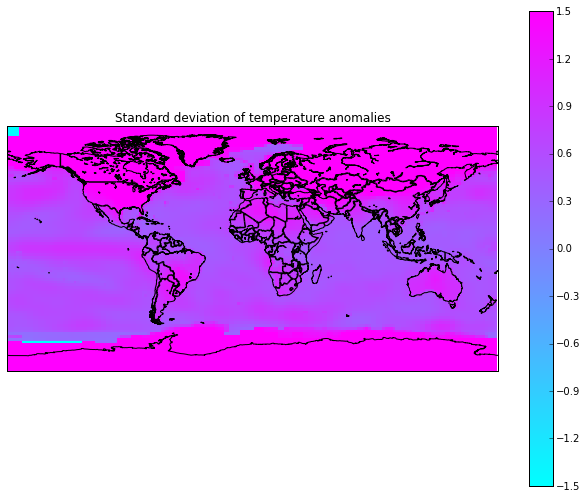

In [1]:
import xray
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

date1 = np.datetime64('1900-01-01')
date2 = np.datetime64('2014-12-31')

nc = xray.open_dataset("gistemp1200_ERSSTv4.nc")

time_1d = nc.variables['time']
lat_1d = nc.variables['lat'].squeeze()
lon_1d = nc.variables['lon'].squeeze()

temp_2d_mean = np.mean(nc['tempanomaly'][(date1<=nc.time) & (nc.time<=date2),:,:], axis=0).values.squeeze()
temp_2d_std = np.std(nc['tempanomaly'][(date1<=nc.time) & (nc.time<=date2),:,:], axis=0).values.squeeze()

lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)

# mean
fig=plt.figure(figsize=(11,8.5))
map = Basemap(llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='l',projection='cyl')
map.pcolormesh(lon_2d, lat_2d, temp_2d_mean,cmap='cool')
map.drawcoastlines()
map.drawcountries(linewidth=1.5)
plt.title("Mean of temperature anomalies")
plt.colorbar()

# std
fig=plt.figure(figsize=(11,8.5))
map = Basemap(llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='l',projection='cyl')
map.pcolormesh(lon_2d, lat_2d, temp_2d_std,cmap='cool',vmin=-1.5, vmax=1.5)
map.drawcoastlines()
map.drawcountries(linewidth=1.5)
plt.title("Standard deviation of temperature anomalies")
plt.colorbar()

(b) Calculate a histogram, PDF, and CDF of temperature anomalies for each 10 degree latitude band (-90 to -80, -80 to -70, etc.).  Color each line with a different line color or style, and include a legend.

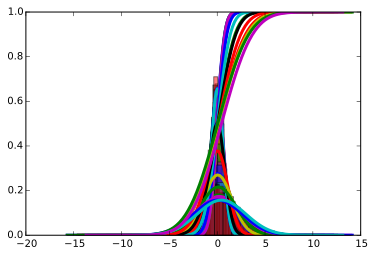

In [4]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

i = 0
obs = {}
while (i < 18):
    obs[i] = ((nc['tempanomaly'][:,(10*(i-9)<=nc.lat) & (nc.lat<=10*(i-8)),:]).values).ravel()
    obs[i] = obs[i][~np.isnan(obs[i])]
    i+=1

i = 0
plt.figure()
while (i < 18):
    plt.hist(obs[i], bins=30, normed=True, alpha=0.5)
    mu, sigma = scipy.stats.norm.fit(obs[i])
    x = np.linspace(obs[i].min(), obs[i].max(), 100)
    plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), lw=3);
    plt.plot(x, scipy.stats.norm.cdf(x, mu, sigma), lw=3);
    i+=1

(c - extra credit) Calculate the 10th and 90th percentile of temperature anomalies at each point, and plot them on a map using `pcolormesh`.  Include a colorbar.